# Logistic Regression on Advertising Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
ads=pd.read_csv("advertising.csv")

In [5]:
ads.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### We will predict whether someone clicked on the Ad

Country, City etc may not be that useful to determine if the click on the ad

Timestamp would be useful, but we dk how to process it

In [4]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


No Null values present.   
All relevant columns are already numerical :)

In [5]:
ads.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

Why do we normalize things?

It helps to ensure the scale of our data is roughly the same (Ellipse vs circle example)

Doesnt affect accuracy for Linear Reg and Logistic Reg (No distance matrix needed). But might need more data/time to reach good accuracy. Hence normalize.

In [6]:
ads.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


C:\Users\rohan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


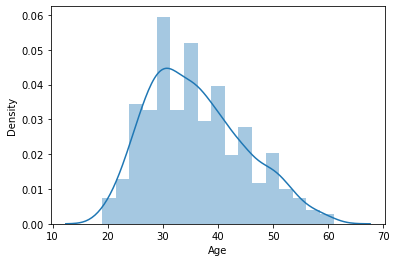

In [9]:
sns.distplot(ads['Age'])

Biased towards young people ^ roughly 35

### If someones age is more than 36, then what are the chances that they will click the ad?

In [17]:
pref = (ads[(ads['Age']>36) & (ads['Clicked on Ad']==1)])['Age'].count()
total = ads[ads['Age']>36]['Age'].count()
probab=pref/total *100
print(probab)

75.46728971962617


C:\Users\rohan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


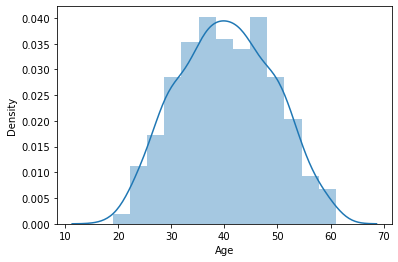

In [18]:
sns.distplot( ads[ ads['Clicked on Ad']==1 ]['Age'] )

But now people who clicked on Ad is more towards 40-ish

Young people probably dont click ads, or use ad blocker.   
Older people are more likely to want to buy stuff online, maybe for them or family

In [20]:
#Mean of age of ppl who clicked on the ad
ads[ ads['Clicked on Ad']==1 ]['Age'].mean()

40.334

Check Age vs Area Income

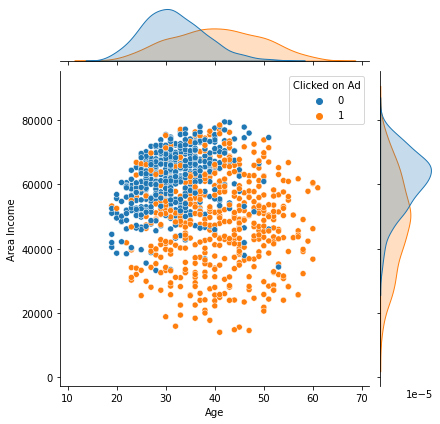

In [7]:
sns.jointplot(x='Age',y='Area Income', data=ads, hue='Clicked on Ad')

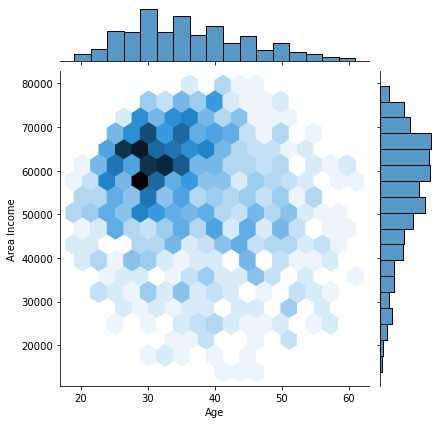

In [23]:
sns.jointplot(x='Age',y='Area Income', data=ads, kind='hex')

Check same for daily time spent

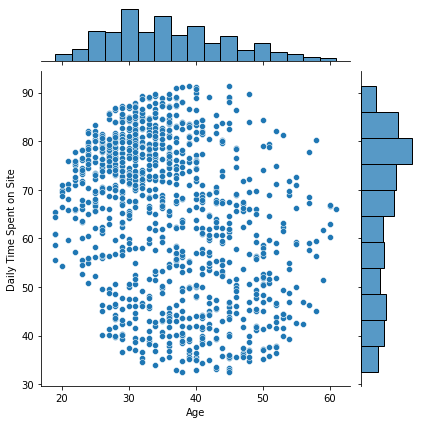

In [24]:
sns.jointplot(x='Age',y='Daily Time Spent on Site', data=ads)

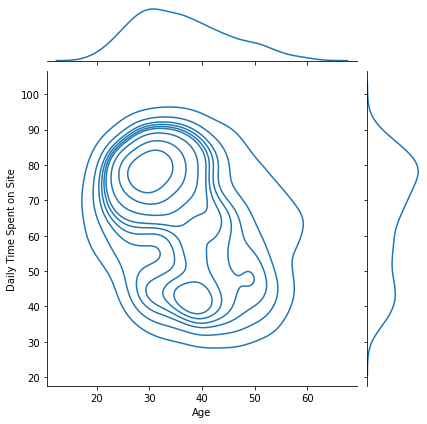

In [26]:
sns.jointplot(x='Age',y='Daily Time Spent on Site', data=ads,kind='kde')

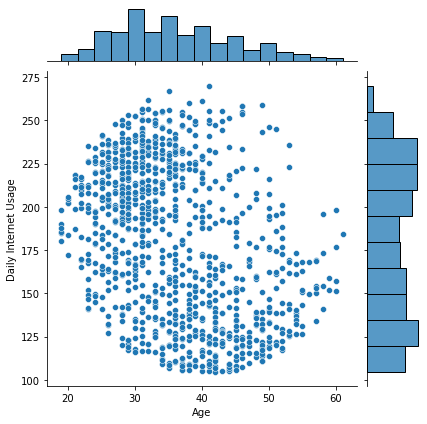

In [27]:
sns.jointplot(x='Age',y='Daily Internet Usage',data=ads)

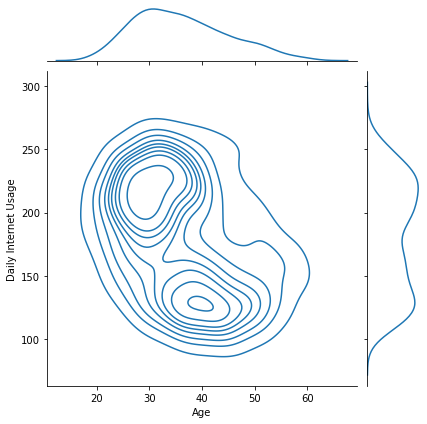

In [29]:
sns.jointplot(x='Age',y='Daily Internet Usage',data=ads, kind='kde')

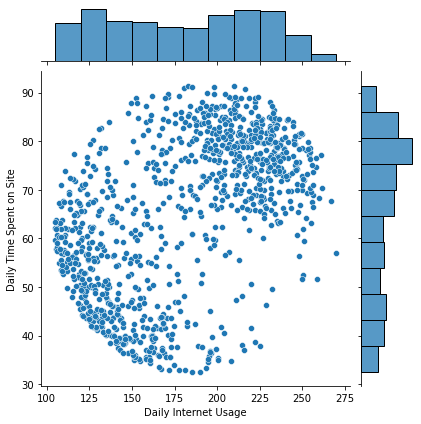

In [31]:
sns.jointplot(x='Daily Internet Usage',y='Daily Time Spent on Site',data=ads)

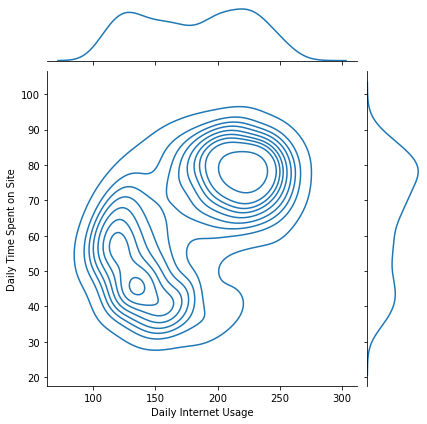

In [32]:
sns.jointplot(x='Daily Internet Usage',y='Daily Time Spent on Site',data=ads,kind='kde')

There are distinct groups in the last few...   
Maybe a lack of data samples from the middle aged people who use the internet that influences the latter graph

In [34]:
ads['Male'].value_counts()

0    519
1    481
Name: Male, dtype: int64

Fairly balanced^ 

In [35]:
ads['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

Surprisingly balanced!

Time to create data:

In [37]:
ads.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [8]:
x=ads[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male' ]]
y=ads['Clicked on Ad']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25, random_state=50)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model=LogisticRegression()

In [13]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [14]:
preds=model.predict(xtest)

In [15]:
preds

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [16]:
(preds==ytest).mean()

0.908

In [17]:
print(model.score(xtest,ytest))

0.908


In [18]:
model.coef_

array([[-6.31689863e-02,  2.47823958e-01, -8.09145951e-06,
        -2.31251388e-02,  1.66571485e-03]])

In [19]:
pd.DataFrame(model.coef_[0], index=x.columns, columns=['Coef'])

,Coef
Daily Time Spent on Site,-0.063169
Age,0.247824
Area Income,-0.000008
Daily Internet Usage,-0.023125
Male,0.001666


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [21]:
print(classification_report(ytest,preds))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       132
           1       0.92      0.88      0.90       118

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [22]:
print(confusion_matrix(ytest,preds))

[[123   9]
 [ 14 104]]


In [23]:
print(roc_auc_score(ytest,preds))

0.9065870570107859


### Lets try with normalization of data!

In [24]:
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [25]:
from sklearn.model_selection import 

In [26]:
scaler = StandardScaler()
xscaled = scaler.fit_transform(x)

In [29]:
xscaled

array([[ 0.24926659, -0.11490498,  0.50969109,  1.73403   , -0.96269532],
       [ 0.96113227, -0.57042523,  1.00253021,  0.31380538,  1.03875025],
       [ 0.28208309, -1.13982553,  0.35694859,  1.28758905, -0.96269532],
       ...,
       [-0.84377541,  1.707176  , -0.93857029, -1.35892388,  1.03875025],
       [-0.59638946, -1.93698596, -0.97548353,  0.18117208, -0.96269532],
       [-1.26155474, -1.13982553, -1.87383208, -0.0376045 , -0.96269532]])

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(xscaled,y,test_size=0.25,random_state=70)

In [38]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [39]:
normpreds=model.predict(xtest)
(normpreds==ytest).mean()

0.984

In [40]:
print(model.score(xtest,ytest))

0.984


In [41]:
pd.DataFrame(model.coef_[0], index=x.columns, columns=['Coef'])

,Coef
Daily Time Spent on Site,-2.475041
Age,1.201899
Area Income,-1.367454
Daily Internet Usage,-2.305431
Male,-0.097395


In [42]:
print(classification_report(ytest,normpreds))
print(confusion_matrix(ytest,normpreds))
print(roc_auc_score(ytest,normpreds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       128
           1       0.98      0.98      0.98       122

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[126   2]
 [  2 120]]
0.9839907786885246


WOW THATS AWESOME ^